<a href="https://colab.research.google.com/github/valerio-unifei/ecom01/blob/main/ECOM01-DS03-ArgumentosValidos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Base de Dados (Dataset)

http://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset

Sete tipos diferentes de **feijões secos** foram utilizados nesta pesquisa, levando em consideração as características como forma, formato, tipo e estrutura pela situação do mercado. Um sistema de visão computacional foi desenvolvido para distinguir sete diferentes variedades registradas de feijões secos com características semelhantes, a fim de obter uma classificação uniforme das sementes. Para o modelo de classificação, imagens de 13.611 grãos de 7 feijões diferentes registrados foram obtidas com uma câmera de alta resolução. As imagens de feijão obtidas pelo sistema de visão computacional foram submetidas às etapas de segmentação e extração de características, totalizando 16 características; 12 dimensões e 4 formas de forma, foram obtidas a partir dos grãos.

In [1]:
# Baixa o arquivo da web
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip -O DryBeanDataset.zip
# extrai arquivos do zip
!unzip -q DryBeanDataset.zip

--2022-04-30 02:16:40--  http://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4738776 (4.5M) [application/x-httpd-php]
Saving to: ‘DryBeanDataset.zip’

DryBeanDataset.zip  100%[===================>]   4.52M  8.21MB/s    in 0.6s    

2022-04-30 02:16:41 (8.21 MB/s) - ‘DryBeanDataset.zip’ saved [4738776/4738776]



In [2]:
import pandas as pd
# carrega arquivo excel existente com base de dados de feijões secos
df = pd.read_excel('/content/DryBeanDataset/Dry_Bean_Dataset.xlsx')
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


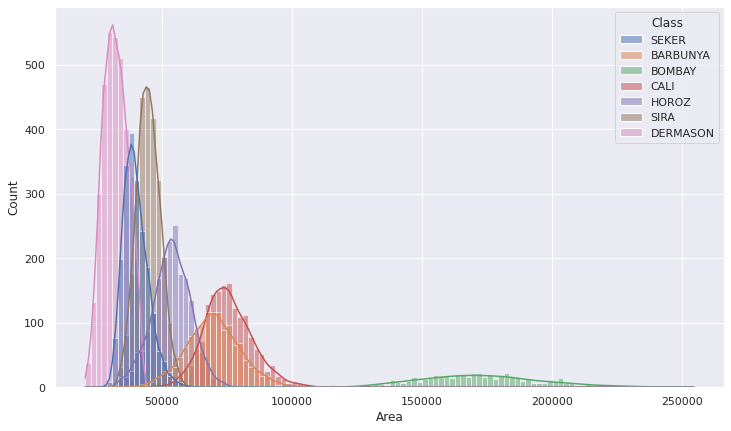

In [3]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,7)})

_ = sns.histplot(data=df, x='Area', kde=True, hue='Class')

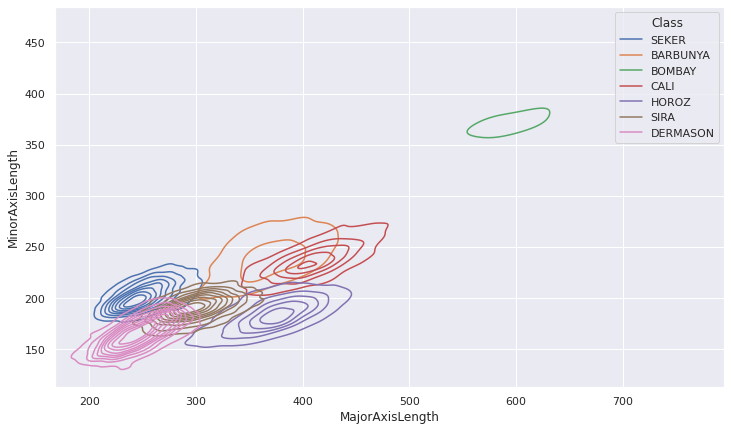

In [4]:
sns.kdeplot(data=df, x='MajorAxisLength',y='MinorAxisLength',hue='Class')

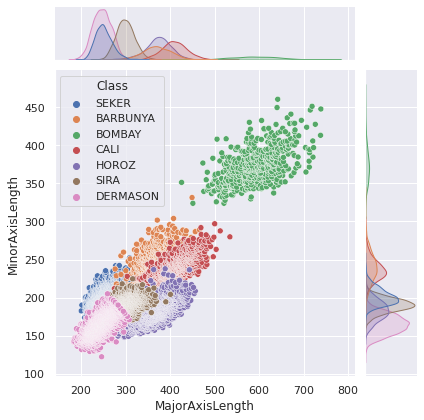

In [5]:
sns.jointplot(data=df, x='MajorAxisLength',y='MinorAxisLength',hue='Class')

# Extrator de Conhecimento

In [6]:
X = df[df.columns[:-1]].values
y, class_names = pd.factorize(df[df.columns[-1]])
columns_names = list(df.columns)

Gerando Árvore de Decisão

In [7]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(X,y)
print('Score =',clf.score(X,y))

Score = 0.8889868488722357


In [19]:
import numpy as np

n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

def find_path(node_numb, path, x):
        path.append(node_numb)
        if node_numb == x:
            return True
        left = False
        right = False
        if (children_left[node_numb] !=-1):
            left = find_path(children_left[node_numb], path, x)
        if (children_right[node_numb] !=-1):
            right = find_path(children_right[node_numb], path, x)
        if left or right :
            return True
        path.remove(node_numb)
        return False


def get_rule(path, column_names):
    mask = ''
    for index, node in enumerate(path):
        #We check if we are not in the leaf
        if index!=len(path)-1:
            # Do we go under or over the threshold ?
            if (children_left[node] == path[index+1]):
                mask += "(['{}'] <= {}) \t ".format(column_names[feature[node]], threshold[node])
            else:
                mask += "(['{}'] > {}) \t ".format(column_names[feature[node]], threshold[node])
    # We insert the & at the right places
    mask = mask.replace("\t", "&", mask.count("\t") - 1)
    mask = mask.replace("\t", "")
    return mask

# Leaves
leave_id = clf.apply(X)

paths ={}
for leaf in np.unique(leave_id):
    path_leaf = []
    find_path(0, path_leaf, leaf)
    paths[leaf] = np.unique(np.sort(path_leaf))

rules = {}
for key in paths:
    rules[key] = get_rule(paths[key], columns_names)

rules

{5: "(['MajorAxisLength'] <= 280.7041931152344) & (['ShapeFactor1'] <= 0.006819602334871888) & (['ShapeFactor3'] <= 0.7274537682533264) & (['roundness'] <= 0.9265730679035187) & (['Perimeter'] <= 745.8924865722656)  ",
 6: "(['MajorAxisLength'] <= 280.7041931152344) & (['ShapeFactor1'] <= 0.006819602334871888) & (['ShapeFactor3'] <= 0.7274537682533264) & (['roundness'] <= 0.9265730679035187) & (['Perimeter'] > 745.8924865722656)  ",
 8: "(['MajorAxisLength'] <= 280.7041931152344) & (['ShapeFactor1'] <= 0.006819602334871888) & (['ShapeFactor3'] <= 0.7274537682533264) & (['roundness'] > 0.9265730679035187) & (['ShapeFactor4'] <= 0.9987176060676575)  ",
 9: "(['MajorAxisLength'] <= 280.7041931152344) & (['ShapeFactor1'] <= 0.006819602334871888) & (['ShapeFactor3'] <= 0.7274537682533264) & (['roundness'] > 0.9265730679035187) & (['ShapeFactor4'] > 0.9987176060676575)  ",
 12: "(['MajorAxisLength'] <= 280.7041931152344) & (['ShapeFactor1'] <= 0.006819602334871888) & (['ShapeFactor3'] > 0.72

# Argumentos Válidos

Verificar se os argumentos abaixo são válidos

```
(MajorAxisLength <= 280.7041931152344), (ShapeFactor1 <= 0.006819602334871888), (ShapeFactor3 <= 0.7274537682533264), 
(roundness <= 0.9265730679035187), (Perimeter <= 745.8924865722656) ∴ (Class == DERMASON)

amostras: 43

```





```
(roundness > 0.9265730679035187), (ShapeFactor4 <= 0.9987176060676575), ∴ (Class == DERMASON)

amostras: 48
```





```
(Perimeter > 745.8924865722656) ∴ (Class == SIRA)

amostras: 131
```





```
(Compactness > 0.8845791220664978), (ShapeFactor1 <= 0.007053160108625889) ∴ (Class == SEKER)

amostras: 63
```



## Demais condições



```
(ShapeFactor3 > 0.7274537682533264), (Compactness <= 0.8695324659347534), 
(ShapeFactor4 <= 0.9966754019260406) ∴ (Class == SIRA)

amostras: 27


(ShapeFactor4 > 0.9966754019260406) ∴ (Class == SEKER)

amostras: 142


(Compactness > 0.8695324659347534), (Extent <= 0.8283936977386475) ∴ (Class == SEKER)

amostras: 1628


(Extent > 0.8283936977386475) ∴ (Class == DERMASON)

amostras: 1


(ShapeFactor1 > 0.006819602334871888), (Perimeter <= 711.3135070800781), (Compactness <= 0.8845791220664978), 
(ShapeFactor1 <= 0.007065028417855501) ∴ (Class == DERMASON)

amostras: 95


(ShapeFactor1 > 0.007065028417855501) ∴ (Class == DERMASON)

amostras: 2797


(Compactness > 0.8845791220664978), (ShapeFactor1 <= 0.007053160108625889) ∴ (Class == SEKER)

amostras: 63


(ShapeFactor1 > 0.007053160108625889) ∴ (Class == DERMASON)

amostras: 22


(Perimeter > 711.3135070800781), (Perimeter <= 739.5480041503906), 
(roundness <= 0.9030214250087738) ∴ (Class == DERMASON)

amostras: 247


(roundness > 0.9030214250087738) ∴ (Class == DERMASON)

amostras: 304


(Perimeter > 739.5480041503906), (MinorAxisLength <= 175.9747085571289) ∴ (Class == DERMASON)

amostras: 16


(MinorAxisLength > 175.9747085571289) ∴ (Class == SIRA)

amostras: 163


(MajorAxisLength > 280.7041931152344), (ShapeFactor3 <= 0.5304427742958069), (MinorAxisLength <= 215.31133270263672), 
(ShapeFactor1 <= 0.006129891611635685), (Extent <= 0.793764054775238) ∴ (Class == HOROZ)

amostras: 15


(Extent > 0.793764054775238) ∴ (Class == CALI)

amostras: 4


(ShapeFactor1 > 0.006129891611635685), (Eccentricity <= 0.8643796145915985) ∴ (Class == HOROZ)

amostras: 495


(Eccentricity > 0.8643796145915985) ∴ (Class == HOROZ)

amostras: 1225


(MinorAxisLength > 215.31133270263672), (MajorAxisLength <= 583.6639404296875), 
(roundness <= 0.7935212254524231) ∴ (Class == HOROZ)

amostras: 20


(roundness > 0.7935212254524231) ∴ (Class == CALI)

amostras: 89


(MajorAxisLength > 583.6639404296875) ∴ (Class == BOMBAY)

amostras: 7


(ShapeFactor3 > 0.5304427742958069), (Perimeter <= 897.3164978027344), (roundness <= 0.9222025275230408), 
(Perimeter <= 764.1730041503906) ∴ (Class == SIRA)

amostras: 322


(Perimeter > 764.1730041503906) ∴ (Class == SIRA)

amostras: 2169


(roundness > 0.9222025275230408), (Area <= 45473.0) ∴ (Class == SIRA)

amostras: 25


(Area > 45473.0) ∴ (Class == SEKER)

amostras: 92


(Perimeter > 897.3164978027344), (MinorAxisLength <= 313.8231506347656), 
(Compactness <= 0.7847835123538971) ∴ (Class == CALI)

amostras: 1855


(Compactness > 0.7847835123538971) ∴ (Class == BARBUNYA)

amostras: 1035


(MinorAxisLength > 313.8231506347656), (roundness <= 0.7931346297264099) ∴ (Class == BARBUNYA)

amostras: 1


(roundness > 0.7931346297264099) ∴ (Class == BOMBAY)

amostras: 515


```

